<a href="https://colab.research.google.com/github/felipetaki/profile/blob/master/TrabalhoFinal_Felipe_Takizawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
#### Aluno: Felipe Takizawa

### Apresentação

##### O Dataset deste trabalho são as informações prisionais estaduais, retiradas do SISDEPEN.

O SISDEPEN é um sistema gerido pelo Departamento Penitenciário Nacional - DEPEN, e trata de informações restritas.

Tais dados são populados, dentro do sistema, pelos próprios estados e o Distrito Federal.

Dentre os dados, temos o sexo dos detentos, a quantidade de detentos, a quantidade máxima que o presídio deveria ter,
a unidade federativa a qual pertence o presídio, entre outras várias informações importantes.

Foi realizado upload do arquivo no Github, pois se trata de documento restrito.

Deste modo, pôde-se realizar os procedimentos na tabela por meio do "path" com link do Github.

#### Link para download do dataset:

In [ ]:
# Caminho da planilha de Excel carregada no Github
path = 'https://github.com/felipetaki/profile/blob/master/images/tabela.xlsx?raw=true'

### Motivação Pessoal

##### Trabalho no Departamento Penitenciário Nacional e, apesar de eu não ter que lidar com ciência de dados, eu tenho interesse.
Destarte, vi a motivação para captar as informações de unidades prisionais, e tentar transformá-las em conhecimento, 
pois trabalho numa área que acessa muitos dados, que é a tecnologia de informação e comunicação.

Neste momento, pretendo obter algum conhecimento básico com as informações menos detalhadas, portanto, será um projeto simples.

O órgão não possui ainda um setor de ciência de dados aplicada, então é mais uma motivação a realizar este projeto.

Trata-se de uma motivação de cunho pessoal, mas que está ligada intimamente ao meu trabalho no Departamento Penitenciário Nacional.

### Investigação

In [ ]:
# Importando as bibliotecas a serem usadas na investigação:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

##### Neste momento será carregado o arquivo de Excel em repositório no Github.

Estas não são informações que devem ser encontradas facilmente, por isso a necessidade de inserir no Github.

Carregando os dados:

In [ ]:
sisdepen = pd.read_excel(path, usecols=[0,1,10,11,12,15,16,17,18,19], skiprows=0, skipfooter=0)
                      # Foi feito o carregamento com apenas algumas colunas da tabela no path,
                      # para testes de leitura, dentro da variável sisdepen, que é o nome do sistema.
                      # Estão são as colunas que serão usadas para a análise de dados:
sisdepen.head()

,A.Ano,A.Referencia,A.Âmbito,A.UF,A.Município,A.1.1 Estabelecimento originalmente destinado a pessoa privadas de liberdade do sexo,A.1.2 Tipo de estabelecimento - originalmente destinado,M.1.3 Capacidade do estabelecimento | Presos provisórios | Masculino,M.1.3 Capacidade do estabelecimento | Presos provisórios | Feminino,M.1.3 Capacidade do estabelecimento | Presos provisórios | Total
0,2019,Junho,Estadual,AC,Cruzeiro do Sul,Misto,Estabelecimento destinado ao cumprimento de pe...,NaN,NaN,NaN
1,2019,Junho,Estadual,AC,Feijó,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
2,2019,Junho,Estadual,AC,Tarauacá,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
3,2019,Junho,Estadual,AC,Rio Branco,Misto,Outro : Unidade Penitenciária Virtual sob sist...,100.0,100.0,200.0
4,2019,Junho,Estadual,AC,Rio Branco,Masculino,Estabelecimento destinado ao recolhimento de p...,440.0,NaN,440.0


##### Verificou-se que os nomes das colunas estão um pouco ruins de trabalhar, portanto, serão modificados:

In [ ]:
sisdepen.rename(columns=
                {  "A.Ano": "Ano",
                   "A.Referencia": "Mes",
                   "A.Âmbito": "Unidade",
                   "A.UF": "Estado",
                   "A.Município": "Cidade",
                   "A.1.1 Estabelecimento originalmente destinado a pessoa privadas de liberdade do sexo": "Sexo",
                   "A.1.2 Tipo de estabelecimento - originalmente destinado":"Tipo do estabelecimento penal",
                   "M.1.3 Capacidade do estabelecimento | Presos provisórios | Masculino": "Capacidade homens", 
                   "M.1.3 Capacidade do estabelecimento | Presos provisórios | Feminino": "Capacidade mulheres", 
                   "M.1.3 Capacidade do estabelecimento | Presos provisórios | Total": "Capacidade total"
                }, inplace = True)
sisdepen.head()
# Assim, o nome das colunas foi alterado para se melhor trabalhar.

,Ano,Mes,Unidade,Estado,Cidade,Sexo,Tipo do estabelecimento penal,Capacidade homens,Capacidade mulheres,Capacidade total
0,2019,Junho,Estadual,AC,Cruzeiro do Sul,Misto,Estabelecimento destinado ao cumprimento de pe...,NaN,NaN,NaN
1,2019,Junho,Estadual,AC,Feijó,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
2,2019,Junho,Estadual,AC,Tarauacá,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
3,2019,Junho,Estadual,AC,Rio Branco,Misto,Outro : Unidade Penitenciária Virtual sob sist...,100.0,100.0,200.0
4,2019,Junho,Estadual,AC,Rio Branco,Masculino,Estabelecimento destinado ao recolhimento de p...,440.0,NaN,440.0


##### Realizados os testes iniciais com as colunas, hora da exposição das informações da tabela, já alterada:


In [ ]:
print(sisdepen)
# Verificou-se que muitas dados não foram preenchidos pois aparece Nan.
# Isto pode ocorrer porque determinada unidade não trabalhe com algum sexo.
# No caso de a capacidade total aparecer Nan é porque o estado não preencheu corretamente.
# Ao todo foram listados 7112 registros. Deve-se realizar a limpeza nos dados.

       Ano       Mes  ... Capacidade mulheres Capacidade total
0     2019     Junho  ...                 NaN              NaN
1     2019     Junho  ...                 0.0              0.0
2     2019     Junho  ...                 0.0              0.0
3     2019     Junho  ...               100.0            200.0
4     2019     Junho  ...                 NaN            440.0
...    ...       ...  ...                 ...              ...
7107  2020  Dezembro  ...                 0.0              0.0
7108  2020  Dezembro  ...                 NaN              NaN
7109  2020  Dezembro  ...                 NaN              NaN
7110  2020  Dezembro  ...                 NaN              NaN
7111  2020  Dezembro  ...                 NaN              NaN

[7112 rows x 10 columns]


##### Serão removidas então as linhas cuja coluna da capacidade total não esteja preenchida, ou seja, estejam com NaN:

In [ ]:
sisdepen_drop = sisdepen.dropna(subset=['Capacidade total'])
print (sisdepen_drop)

       Ano       Mes  ... Capacidade mulheres Capacidade total
1     2019     Junho  ...                 0.0              0.0
2     2019     Junho  ...                 0.0              0.0
3     2019     Junho  ...               100.0            200.0
4     2019     Junho  ...                 NaN            440.0
5     2019     Junho  ...                32.0             32.0
...    ...       ...  ...                 ...              ...
7091  2020  Dezembro  ...                 NaN            240.0
7092  2020  Dezembro  ...                 0.0             16.0
7093  2020  Dezembro  ...                 NaN            100.0
7096  2020  Dezembro  ...                 NaN             40.0
7107  2020  Dezembro  ...                 0.0              0.0

[3632 rows x 10 columns]


In [ ]:
# Verifica-se que os estados deixam de inserir muitos dados na tabela.
# Das 7112 apenas restaram 3632, mas ainda muitas linhas possuem dados zerados.
# Esta é uma situação recorrente, logo, os estados não têm muita vontade em preencher a tabela, para informar ao DEPEN sua situação.
# Neste caso, limparemos os dados zerados na capacidade total.

##### Limpeza das linhas cuja coluna de capacidade total esteja zerada:

In [ ]:

df1 = pd.DataFrame()
df1 = sisdepen_drop[~((sisdepen_drop['Capacidade total'] == 0))]
print('Total de',str(len(df1)),'registros')

df1

Total de 2996 registros


,Ano,Mes,Unidade,Estado,Cidade,Sexo,Tipo do estabelecimento penal,Capacidade homens,Capacidade mulheres,Capacidade total
3,2019,Junho,Estadual,AC,Rio Branco,Misto,Outro : Unidade Penitenciária Virtual sob sist...,100.0,100.0,200.0
4,2019,Junho,Estadual,AC,Rio Branco,Masculino,Estabelecimento destinado ao recolhimento de p...,440.0,NaN,440.0
5,2019,Junho,Estadual,AC,Rio Branco,Feminino,Estabelecimento destinado a diversos tipos de ...,NaN,32.0,32.0
12,2019,Junho,Estadual,AC,Sena Madureira,Masculino,Estabelecimento destinado a diversos tipos de ...,180.0,NaN,180.0
13,2019,Junho,Estadual,AC,Cruzeiro do Sul,Misto,Outro : Estabelecimento que abriga atualmente ...,447.0,15.0,462.0
...,...,...,...,...,...,...,...,...,...,...
7089,2020,Dezembro,Estadual,TO,Miranorte,Masculino,Estabelecimento destinado ao cumprimento de pe...,21.0,NaN,21.0
7091,2020,Dezembro,Estadual,TO,Palmas,Masculino,Outro : Estabelecimento destinado ao recolhim...,240.0,NaN,240.0
7092,2020,Dezembro,Estadual,TO,Palmeirópolis,Masculino,Estabelecimento destinado ao recolhimento de p...,16.0,0.0,16.0
7093,2020,Dezembro,Estadual,TO,Paraíso do Tocantins,Misto,Estabelecimento destinado a diversos tipos de ...,100.0,NaN,100.0


###### Realizando a limpeza de dados, restam 2996 linhas preenchidas, possivelmente de forma correta.

In [ ]:
print(df1)

       Ano       Mes  ... Capacidade mulheres Capacidade total
3     2019     Junho  ...               100.0            200.0
4     2019     Junho  ...                 NaN            440.0
5     2019     Junho  ...                32.0             32.0
12    2019     Junho  ...                 NaN            180.0
13    2019     Junho  ...                15.0            462.0
...    ...       ...  ...                 ...              ...
7089  2020  Dezembro  ...                 NaN             21.0
7091  2020  Dezembro  ...                 NaN            240.0
7092  2020  Dezembro  ...                 0.0             16.0
7093  2020  Dezembro  ...                 NaN            100.0
7096  2020  Dezembro  ...                 NaN             40.0

[2996 rows x 10 columns]


### Antes de trabalhar com os dados limpos, é possível realizar a análise de eficiência de colaboração das unidades federativas.

##### Neste passo, podemos analisar graficamente os estados que menos preenchem os dados.

In [ ]:
# Pode-se fazer o inverso do dataframe anterior, e manter apenas os estados que não preencheram corretamente:
df2 = pd.DataFrame()
df2 = sisdepen_drop[~((sisdepen_drop['Capacidade total'] != 0))]
print('Total de',str(len(df2)),'registros')

df2

Total de 636 registros


,Ano,Mes,Unidade,Estado,Cidade,Sexo,Tipo do estabelecimento penal,Capacidade homens,Capacidade mulheres,Capacidade total
1,2019,Junho,Estadual,AC,Feijó,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
2,2019,Junho,Estadual,AC,Tarauacá,Misto,Outro : Monitoramento eletronico,0.0,0.0,0.0
7,2019,Junho,Estadual,AC,Rio Branco,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
10,2019,Junho,Estadual,AC,Rio Branco,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
28,2019,Junho,Estadual,AM,Manaus,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7046,2020,Dezembro,Estadual,SP,Lavínia,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
7050,2020,Dezembro,Estadual,SP,Avaré,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
7053,2020,Dezembro,Estadual,SP,Lavínia,Masculino,Estabelecimento destinado ao cumprimento de pe...,0.0,0.0,0.0
7054,2020,Dezembro,Estadual,SP,Potim,Masculino,Estabelecimento destinado a diversos tipos de ...,0.0,NaN,0.0


##### Tendo os dados, pode-se analisar graficamente os estados pouco colaborativos:

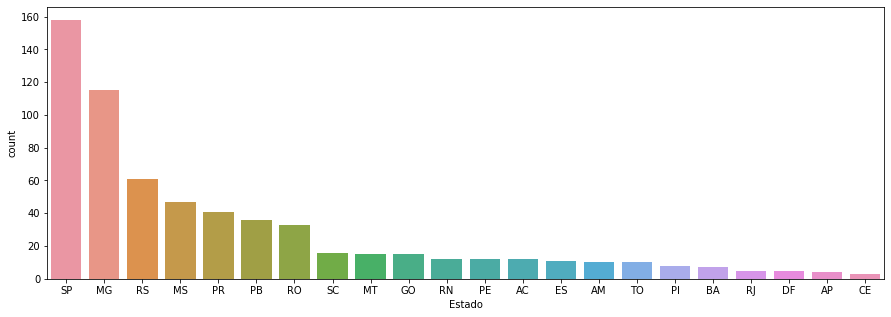

In [ ]:
fig = plt.figure(figsize=(15,5))
estado_nulo = sns.countplot(x='Estado', data=df2, order=df2['Estado'].value_counts().index)

# São Paulo, Minas Gerais, Rio Grande do Sul e Mato Grosso do Sul são os estados que mais preencheram de forma errônea.
# Dada a população de Mato Grosso do Sul, pode-se dizer que é o estado que mais negligencia o preenchimento em relação à sua população.
# Desconsiderando a população total do estado, São Paulo é discrepante em relação a Minas Gerais, que é o segundo estado mais negligente.
# Minas Gerais, sendo o segundo estado mais negligente, é discrepante em relação a todos os demais.
# É válido mencionar que nem todas as unidades federativas se encontram na listagem, o que denota estados colaborativos.

##### Pode-se agora analisar os estados por efetiva colaboração no preenchimento por linhas:


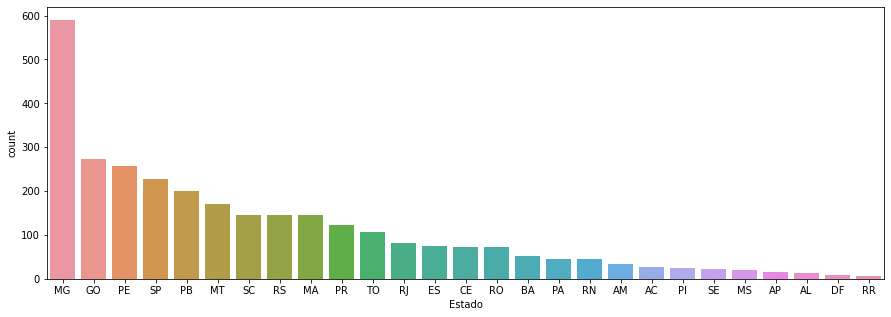

In [ ]:
fig = plt.figure(figsize=(15,5))
estado_colab1 = sns.countplot(x='Estado', data=df1, order=df1['Estado'].value_counts().index)
# Minas Gerais, Goiás e Pernambuco e São Paulo são os estados que mais preencheram de forma correta.
# No caso de São Paulo, sendo o estado mais populoso da União, estar em quarto é uma situação muito aquém do correto.
# Minas Gerais foi o segundo que preencheu de forma mais errônea, porém o primeiro na colaboração correta.
# Além disso, a colaboração de Minas Gerais é discrepante em relação às demais, praticamente um outlier.
# Assim, considera-que Minas Gerais é o estado mais colaborativo de todos, por uma margem enorme de diferença.

##### Agora, pode-se analisar os estados por capacidade total, nas linhas corretamente preenchidas:

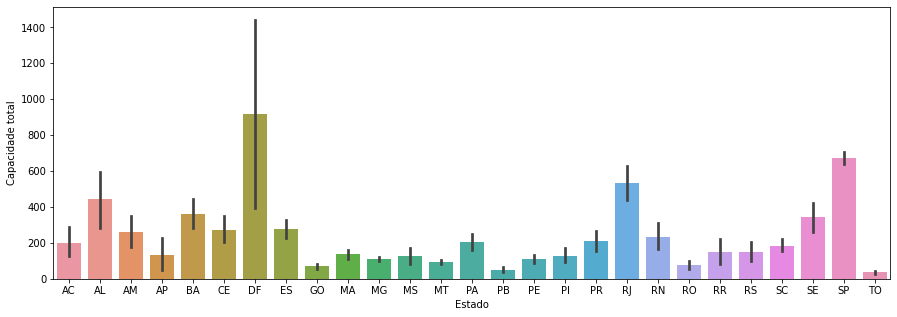

In [ ]:
fig = plt.figure(figsize=(15,5))
estado_colab2 = sns.barplot(data=df1, x='Estado', y='Capacidade total')

# Distrito Federal, São Paulo, Rio de Janeiro e Alagoas são os estados que mais possuem capacidade, dentre os preenchidos corretamente.
# Isto não significa que o Distrito Federal seja a UF que mais possui capacidade total no país, e sim que DF foi mais colaborativo que SP.
# Isso demonstra o quanto São Paulo negligenciou informar dados à União.
# Pela análise do gráfico em comparação ao gráfico anterior, verifica-se que, apesar de o estado de Minas Gerais ter sido bem colaborativo,
# A colaboração não demonstra que os dados informados apresentem a população do estado e sim uma amostragem ínfima.
# A parcela de MG que não teve preenchimento no gráfico de negligência afetou bastante este valor.
# Pela análise da tabela e dos gráficos, então cabe definir DF como o estado que mais colabora com o DEPEN.
# Um fator para isso ocorrer é que a Sede do DEPEN também fica no DF, e a colaboração com a secretaria de segurança do DF é grande.


## Conclusões e Achados

##### Os estados pouco querem colaborar com informações no SISDEPEN;
##### O Distrito Federal foi a UF mais eficiente na população de dados;
##### São Paulo é o estado mais negligente em relação a população de dados no Sisdepen. Nesse caso, pode haver relação com a política da União, que vai de encontro à política do estado.
##### É preciso que o DEPEN melhore a comunicação com as unidades federativas, pois o Sisdepen não está servindo ao propósito de informar com eficiência a respeito dos dados prisionais;
##### Realizar uma análise na tabela com os dados já limpos levariam tal a um caminho errado pois a tabela, que foi retirada do próprio Sisdepen, teve muitas linhas sem preenchimentos ou com preenchimentos errados, e isso porque somente foram consideradas algumas colunas.
##### Conclui-se que a tabela de informações prisionais não serve para obter dados confiáveis, assim, não há como comparar informações prisionais de forma correta.
##### Seria necessário um controle a ser feito entre o DEPEN e as UF, para que a população dos dados seja o mais próximo da verdade.